In [1]:
import sys

sys.path.insert(0, "..")

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from funbin.geometry import Box, as_poly_collection
from funbin.penrose import PHI, penrose_tiling_subdivision, penrose_tiling_triangles

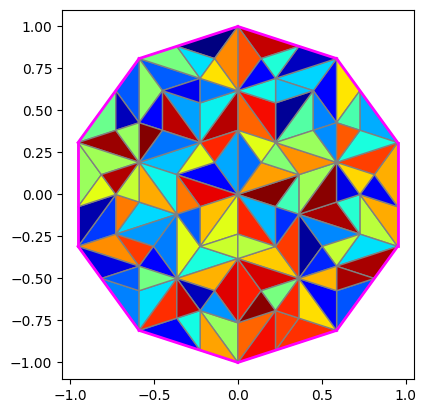

In [3]:
from matplotlib.lines import Line2D

from funbin.penrose import penrose_tiling_triangles_border

tiling = penrose_tiling_triangles(kind="P3", divisions=3)

fig, ax = plt.subplots()
ax.add_collection(as_poly_collection(tiling, randomize_color=True))

for edge in penrose_tiling_triangles_border():
    ax.add_line(Line2D([edge[0].x, edge[1].x], [edge[0].y, edge[1].y], linewidth=2, color="magenta"))

Box.bounding_all(tiling).resized(1.1).fit_axes(ax)
ax.set_aspect("equal")

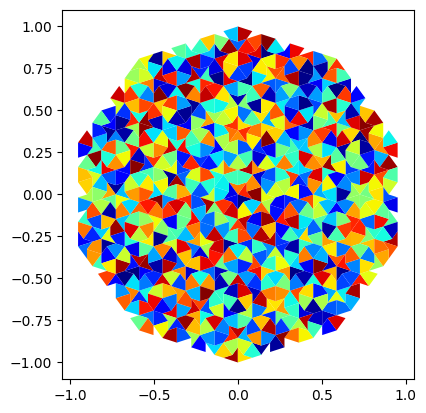

In [4]:
merged_tiling = penrose_tiling_subdivision(kind="P2", divisions=5, include_incomplete_tiles=False)
fig, ax = plt.subplots()
ax.add_collection(as_poly_collection(merged_tiling, randomize_color=True, edgecolors="none"))
Box.bounding_all(tiling).resized(1.1).fit_axes(ax)
ax.set_aspect("equal")

In [5]:
tris = penrose_tiling_triangles(kind="P2", divisions=9)
areas = np.array([t.area for t in tris])

divide = 0.5 * (np.min(areas) + np.max(areas))

smalls = np.count_nonzero(areas < divide)
bigs = areas.size - smalls
print((3 * bigs + 2 * smalls) / areas.size - 1)
print(PHI)

1.6180339985218035
1.618033988749895


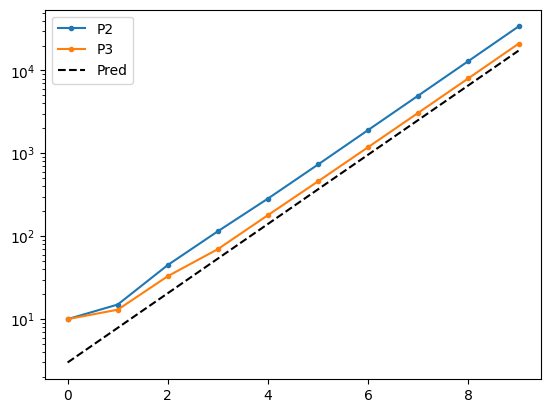

In [7]:
fig, ax = plt.subplots()

maxdiv = 9

for kind in ("P2", "P3"):
    data = []
    for div in range(maxdiv + 1):
        tl = penrose_tiling_subdivision(kind=kind, divisions=div, include_incomplete_tiles=True)
        data.append((div, len(tl)))

    ax.plot(*np.array(data).T, label=kind, marker=".", linestyle="-")


div = np.linspace(0, maxdiv)
ax.plot(div, 3 * (1 + PHI) ** div, linestyle="--", color="k", label="Pred")

ax.legend()
ax.set_yscale("log")